Identifying the most valuable customers based on the data.

In [1]:
# IMPORT LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
# Read the dataset

df = pd.read_csv(r"E:/UFT_TeamProject/updated_file/combined_table.csv")

In [3]:
# Display the first 5 rows of the DataFrame
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [4]:
# Display the last 5 rows of the DataFrame
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,12/9/2011 12:50,18.00,12680.0,France


In [5]:
# Get the dimensions of the DataFrame
df.shape

(1067371, 8)

In [6]:
# Display the summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Data Cleaning

In [7]:
# Finding missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [8]:
# Percentage of missing values
df.isnull().sum()/df.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [9]:
# Finding duplicates
df.duplicated().sum()

34335

In [10]:
# Finding garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("********")

Invoice
537434     1350
538071     1304
537638     1202
537237     1194
536876     1186
           ... 
C518262       1
548515        1
C548513       1
C524395       1
559376        1
Name: count, Length: 53628, dtype: int64
********
StockCode
85123A       5829
22423        4424
85099B       4216
21212        3318
20725        3259
             ... 
21345           1
DCGS0067        1
DCGS0066P       1
DCGS0071        1
90197A          1
Name: count, Length: 5304, dtype: int64
********
Description
WHITE HANGING HEART T-LIGHT HOLDER     5918
REGENCY CAKESTAND 3 TIER               4412
JUMBO BAG RED RETROSPOT                3469
ASSORTED COLOUR BIRD ORNAMENT          2958
PARTY BUNTING                          2765
                                       ... 
add stock to allocate online orders       1
eurobargain invc/credit                   1
CHROME EURO HOOK 20cm                     1
allocate stock for dotcom orders ta       1
correct previous adjustment               1
Name: count, 

In [11]:
# Choose the method of inputting missing values
# We have only missing values in Description & Customer ID. Where customer id should be unique. So dropping the missing rows instead of filling them.

df = df.dropna(subset=['Customer ID'])

In [12]:
# Check for missing values in each column
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [13]:
# Check for duplicate rows in the DataFrame
df.duplicated().sum()

26479

In [14]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [15]:
# Check for duplicate rows in the DataFrame after cleaning it
df.duplicated().sum()

0

In [16]:
# Remove rows from the DataFrame where the 'Description' column matches any of the values in the garbage_descriptions list
garbage_descriptions = [
    'stock credited from royal yacht inc',
    'dotcom email'
]
df = df[~df['Description'].isin(garbage_descriptions)] #Filter DataFrame by excluding rows falls in garbage_descriptions list

In [17]:
#Display the summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [18]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Feature engineering: We can create new features such as:

Total Spend(by customer): Quantity * Price

Recency: Days since the customer's last purchase.

Frequency: Number of purchases made by the customer.

Monetary Value: Sum of the customer's total spend.

In [19]:
# Create a new column for TotalSpend (Quantity * Price) for each customer.
df['TotalSpend'] = df['Quantity'] * df['Price']

In [20]:
# Group by both 'Customer ID' column

rfm_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency of purchases
    'TotalSpend': 'sum'  # Total spend (Monetary value)
}).reset_index()


In [21]:
# Rename columns to reflect RFM metrics
rfm_df.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']


In [22]:
#Display the summary of DataFrame
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5942 non-null   float64
 1   Recency      5942 non-null   int64  
 2   Frequency    5942 non-null   int64  
 3   Monetary     5942 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 185.8 KB


In [23]:
# Display the first 5 rows of DataFrame
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,17,-51.74
1,12347.0,1,8,4921.53
2,12348.0,74,5,2019.40
3,12349.0,18,5,4404.54
4,12350.0,309,1,334.40


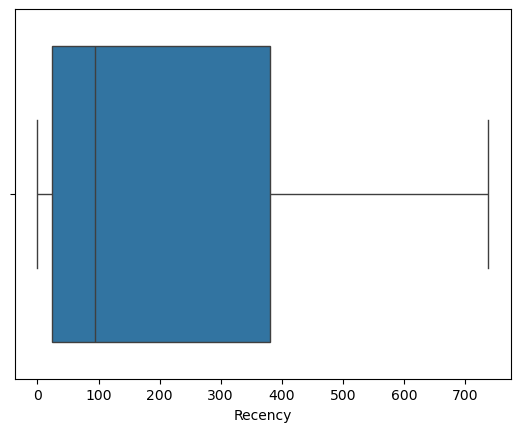

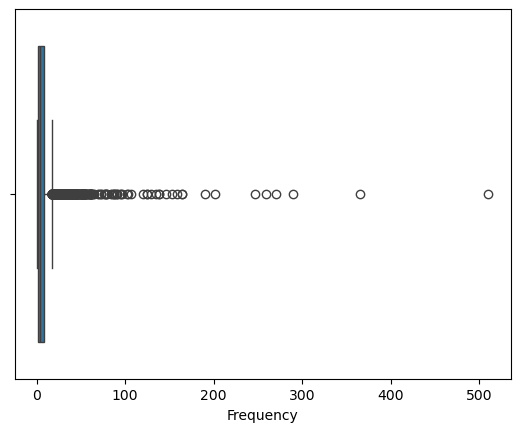

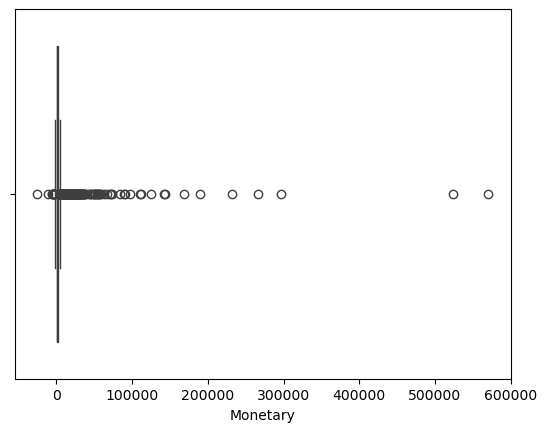

In [24]:
# Boxplot to identify Outliers

for i in ['Recency', 'Frequency','Monetary']:
    sns.boxplot(data=rfm_df, x=i)
    plt.show()


In [25]:
# Removing Outlier
# IQR Method: Calculate the Interquartile Range (IQR) and identify values that fall below Q1−1.5×IQR or above Q3+1.5×IQR.

def boundaries(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound,upper_bound

In [26]:
for i in ['Recency','Frequency', 'Monetary']:
    lower_bound,upper_bound = boundaries(rfm_df[i])  # Get the lower and upper bounds for the current column using the 'boundaries' function
    rfm_df[i]=np.where(rfm_df[i]<lower_bound, lower_bound, rfm_df[i])  # Adjust values below lower bound 
    rfm_df[i]=np.where(rfm_df[i]>upper_bound, upper_bound, rfm_df[i]) # Adjust values below upper bound 


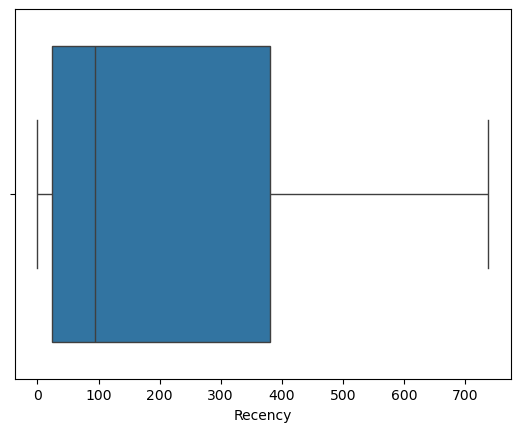

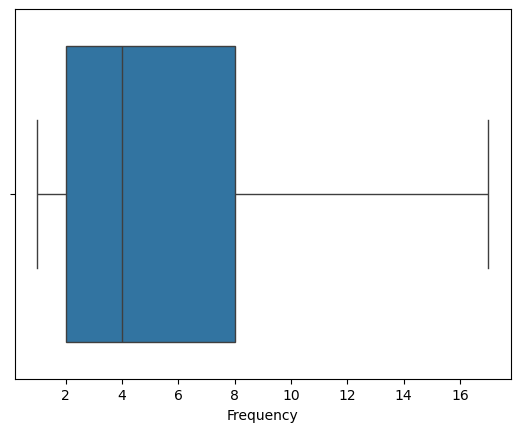

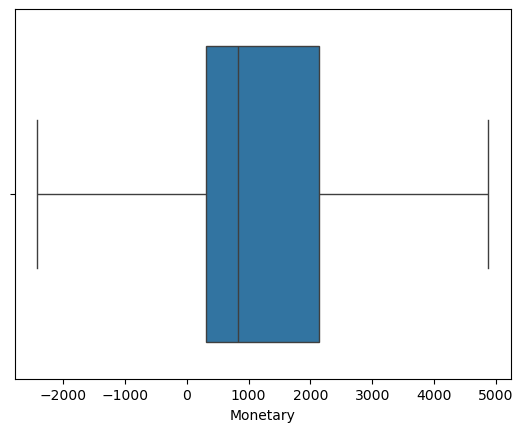

In [27]:
#Checking again after removing outliers
for i in ['Recency','Frequency', 'Monetary']:    
    sns.boxplot(data=rfm_df, x=i)
    plt.show()

Scale Features

In [29]:
# Scale RFM features
scaler = StandardScaler()
rfm_scaled = rfm_df[['Recency', 'Frequency', 'Monetary']].copy()
rfm_scaled[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_scaled)

Determine Optimal Clusters Using the Elbow Method

In [30]:
# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)


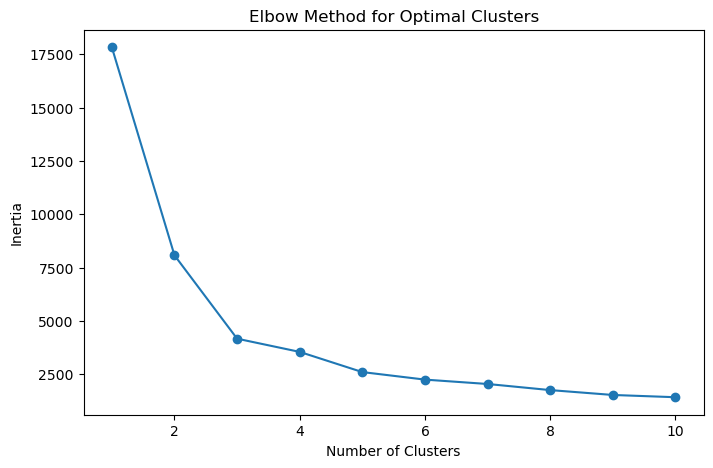

In [31]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [32]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm_df


,Customer ID,Recency,Frequency,Monetary,Cluster
0,12346.0,325.0,17.0,-51.74,1
1,12347.0,1.0,8.0,4873.89,2
2,12348.0,74.0,5.0,2019.40,1
3,12349.0,18.0,5.0,4404.54,2
4,12350.0,309.0,1.0,334.40,0
...,...,...,...,...,...
5937,18283.0,3.0,17.0,2664.90,2
5938,18284.0,429.0,2.0,436.68,0
5939,18285.0,660.0,1.0,427.00,0
5940,18286.0,476.0,3.0,1188.43,0


In [33]:
# Assign RFM scores based on "Recency", "Frequency", and "Monetary" for each cluster.
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4, 3, 2, 1]).astype(int)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=4, labels=[1, 2, 3, 4]).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=4, labels=[1, 2, 3, 4]).astype(int)
# Combine RFM Scores into a single score
rfm_df['RFM_Score'] = rfm_df[['R_Score','F_Score','M_Score']].sum(axis=1)

In [34]:
# Calculate mean values for "Recency", "Frequency", and "Monetary" for each cluster.
group=rfm_df.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean()
group

,Recency,Frequency,Monetary
Cluster,,,
0,474.947286,2.239040,493.728059
1,83.252954,3.987445,950.247565
2,48.780728,13.918058,4044.403864


In [35]:
#Classifying customers based on their cluster assignment into one of three categories: "High-Value", "Mid-Value" or "Low-value."
rfm_df['Customer_Category'] = rfm_df.apply(lambda row: "Mid-Value" if row["Cluster"] == 1
                               else "High-Value" if row["Cluster"] == 2
                               else "Low-Value", axis=1)
rfm_df


,Customer ID,Recency,Frequency,Monetary,Cluster,R_Score,F_Score,M_Score,RFM_Score,Customer_Category
0,12346.0,325.0,17.0,-51.74,1,2,4,1,7,Mid-Value
1,12347.0,1.0,8.0,4873.89,2,4,3,4,11,High-Value
2,12348.0,74.0,5.0,2019.40,1,3,3,3,9,Mid-Value
3,12349.0,18.0,5.0,4404.54,2,4,3,4,11,High-Value
4,12350.0,309.0,1.0,334.40,0,2,1,2,5,Low-Value
...,...,...,...,...,...,...,...,...,...,...
5937,18283.0,3.0,17.0,2664.90,2,4,4,4,12,High-Value
5938,18284.0,429.0,2.0,436.68,0,1,1,2,4,Low-Value
5939,18285.0,660.0,1.0,427.00,0,1,1,2,4,Low-Value
5940,18286.0,476.0,3.0,1188.43,0,1,2,3,6,Low-Value


In [36]:
#Identifying the numbers of customers in each Customer Category
Customer_Counts = rfm_df["Customer_Category"].value_counts()
Customer_Counts

Customer_Category
Mid-Value     2708
Low-Value     1916
High-Value    1318
Name: count, dtype: int64

In [37]:
#Updating the Customer counts column name and sorting the values for graphical representation.
Customer_Counts = rfm_df["Customer_Category"].value_counts().reset_index()
Customer_Counts.columns = ['Customer_Category', 'count'] 
Customer_Counts = Customer_Counts.sort_values('Customer_Category')

In [38]:
#Visual representation of customers distribution based on customer category
import plotly.express as px
import plotly.colors

Fig = px.bar(Customer_Counts,
             x='Customer_Category',
             y='count',
             title = 'Customer Distribution by Customer Category',
             labels= {'Customer_Category' : 'Customer Category' , 'count': 'Number of Customers'},
             color= 'Customer_Category',
             color_discrete_sequence=px.colors.qualitative.Pastel)

Fig.show()



In [39]:
# Function to categorize customers based on their RFM Score
def categorize_rfm(score):
    if score >= 10:
        return 'VIP' # High-value customers
    elif score >= 7:
        return 'Loyal' # Loyal customers with decent RFM scores
    elif score >= 4:
        return 'At Risk' # Customers at risk of churn
    else:
        return 'Lost' # Customers with low engagement or spend

# create a new column 'Customer_Segment'
rfm_df['Customer_Segment'] = rfm_df['RFM_Score'].apply(categorize_rfm)

# Count customers in each category
category_counts = rfm_df['Customer_Segment'].value_counts().reset_index()
category_counts.columns = ['Customer_Segment', 'Count']


In [40]:
# Create bar chart
fig = px.bar(
    category_counts,
    x='Customer_Segment',
    y='Count',
    title='Customer Distribution by RFM Score',
    labels={'Customer_Segment': 'Segment', 'Count': 'Number of Customers'},
    color='Customer_Segment',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Customize layout
fig.update_layout(
    xaxis_title='Customer Segments',
    yaxis_title='Number of Customers',
    template='plotly_white'
)

# Show the chart
fig.show()


In [41]:
import plotly.graph_objects as go

# Group by 'Customer_Category' and calculate the mean R, F, and M scores
category_scores = rfm_df.groupby('Customer_Segment')[['R_Score', 'F_Score', 'M_Score']].mean().round(3)

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(name='Recency Score', x=category_scores.index, y=category_scores['R_Score'], marker_color='rgb(158,202,225)'),
    go.Bar(name='Frequency Score', x=category_scores.index, y=category_scores['F_Score'], marker_color='rgb(94,158,217)'),
    go.Bar(name='Monetary Score', x=category_scores.index, y=category_scores['M_Score'], marker_color='rgb(32,102,148)')
])

# Update the layout
fig.update_layout(
    title='Comparison of RFM Scores across Customer Segments',
    xaxis_title='Customer Segments',
    yaxis_title='Score',
    barmode='group',
    template='plotly'
)

# Show the plot
fig.show()



